# Szeregi czasowe

### Co, jak i dlaczego ?

#### Przygotowanie danych

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# Import modeli statystycznych
import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.tsa.stattools import adfuller

In [2]:
# Ustawienie parametrów wykresów
plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = (15, 10)

In [3]:
# Wczytanie danych z pliku csv 
df = pd.read_csv('MonthWiseMarketArrivals_clean.csv')

In [4]:
df.head()

,market,month,year,quantity,priceMin,priceMax,priceMod,state,city,date
0,ABOHAR(PB),January,2005,2350,404,493,446,PB,ABOHAR,January-2005
1,ABOHAR(PB),January,2006,900,487,638,563,PB,ABOHAR,January-2006
2,ABOHAR(PB),January,2010,790,1283,1592,1460,PB,ABOHAR,January-2010
3,ABOHAR(PB),January,2011,245,3067,3750,3433,PB,ABOHAR,January-2011
4,ABOHAR(PB),January,2012,1035,523,686,605,PB,ABOHAR,January-2012


In [5]:
#Zmaina typu daty 
df.date = pd.DatetimeIndex(df.date)

In [6]:
df.head()

,market,month,year,quantity,priceMin,priceMax,priceMod,state,city,date
0,ABOHAR(PB),January,2005,2350,404,493,446,PB,ABOHAR,2005-01-01
1,ABOHAR(PB),January,2006,900,487,638,563,PB,ABOHAR,2006-01-01
2,ABOHAR(PB),January,2010,790,1283,1592,1460,PB,ABOHAR,2010-01-01
3,ABOHAR(PB),January,2011,245,3067,3750,3433,PB,ABOHAR,2011-01-01
4,ABOHAR(PB),January,2012,1035,523,686,605,PB,ABOHAR,2012-01-01


In [7]:
#Ustawienie daty jako index 
df.index = pd.Series(df.date, ).rename('Index_data')

In [8]:
df.head()

,market,month,year,quantity,priceMin,priceMax,priceMod,state,city,date
Index_data,,,,,,,,,,
2005-01-01,ABOHAR(PB),January,2005,2350,404,493,446,PB,ABOHAR,2005-01-01
2006-01-01,ABOHAR(PB),January,2006,900,487,638,563,PB,ABOHAR,2006-01-01
2010-01-01,ABOHAR(PB),January,2010,790,1283,1592,1460,PB,ABOHAR,2010-01-01
2011-01-01,ABOHAR(PB),January,2011,245,3067,3750,3433,PB,ABOHAR,2011-01-01
2012-01-01,ABOHAR(PB),January,2012,1035,523,686,605,PB,ABOHAR,2012-01-01


In [9]:
#Sortujemy względem daty
df = df.sort_index()

In [10]:
df.head()

,market,month,year,quantity,priceMin,priceMax,priceMod,state,city,date
Index_data,,,,,,,,,,
1996-01-01,LASALGAON(MS),January,1996,225063,160,257,226,MS,LASALGAON,1996-01-01
1996-02-01,LASALGAON(MS),February,1996,196164,133,229,186,MS,LASALGAON,1996-02-01
1996-03-01,LASALGAON(MS),March,1996,178992,155,274,243,MS,LASALGAON,1996-03-01
1996-04-01,LASALGAON(MS),April,1996,192592,136,279,254,MS,LASALGAON,1996-04-01
1996-05-01,LASALGAON(MS),May,1996,237574,154,312,269,MS,LASALGAON,1996-05-01


######  Będziemy analizować dane dla Bangalore 

In [11]:
dfBang = df.loc[df.city == "BANGALORE"].copy()

In [12]:
dfBang.head()

,market,month,year,quantity,priceMin,priceMax,priceMod,state,city,date
Index_data,,,,,,,,,,
2004-01-01,BANGALORE,January,2004,227832,916,1066,991,KNT,BANGALORE,2004-01-01
2004-02-01,BANGALORE,February,2004,225133,741,870,793,KNT,BANGALORE,2004-02-01
2004-03-01,BANGALORE,March,2004,221952,527,586,556,KNT,BANGALORE,2004-03-01
2004-04-01,BANGALORE,April,2004,185150,419,518,465,KNT,BANGALORE,2004-04-01
2004-05-01,BANGALORE,May,2004,137390,400,516,455,KNT,BANGALORE,2004-05-01


In [13]:
dfBang = dfBang.drop(["market","month","year","state","city","priceMin","priceMax"], axis = 1)

In [14]:
dfBang.head()

,quantity,priceMod,date
Index_data,,,
2004-01-01,227832,991,2004-01-01
2004-02-01,225133,793,2004-02-01
2004-03-01,221952,556,2004-03-01
2004-04-01,185150,465,2004-04-01
2004-05-01,137390,455,2004-05-01


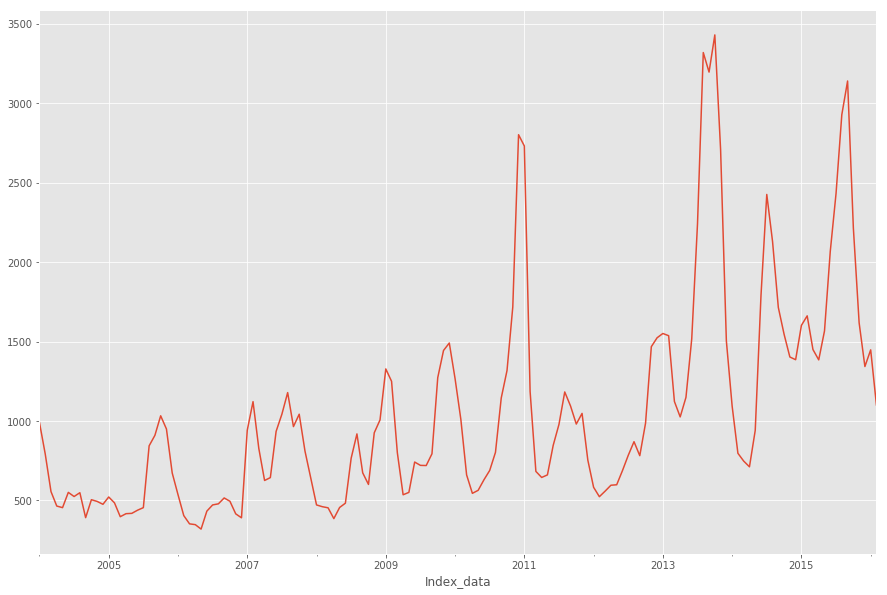

In [15]:
dfBang.priceMod.plot()

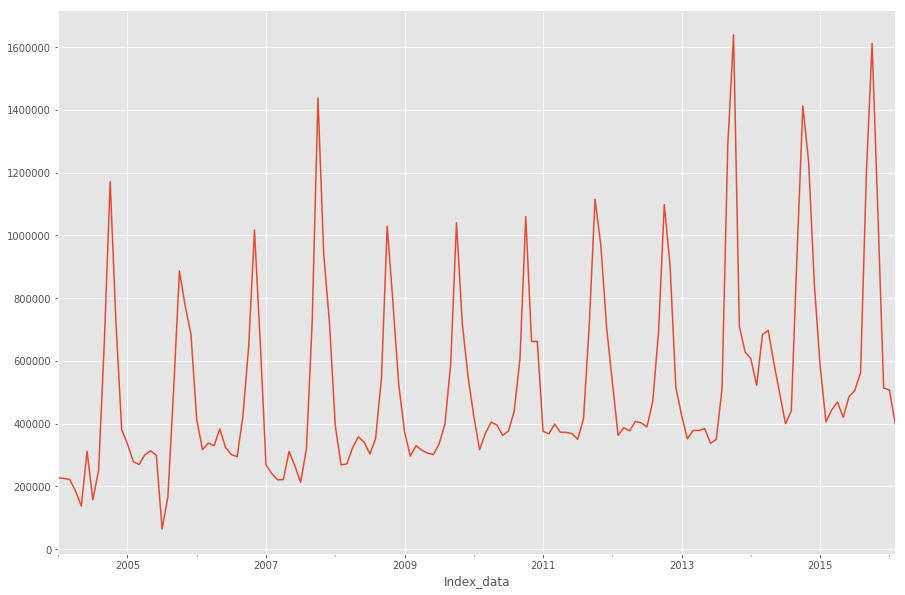

In [16]:
dfBang.quantity.plot()

######  Stablilizacja szeregów czasowych 

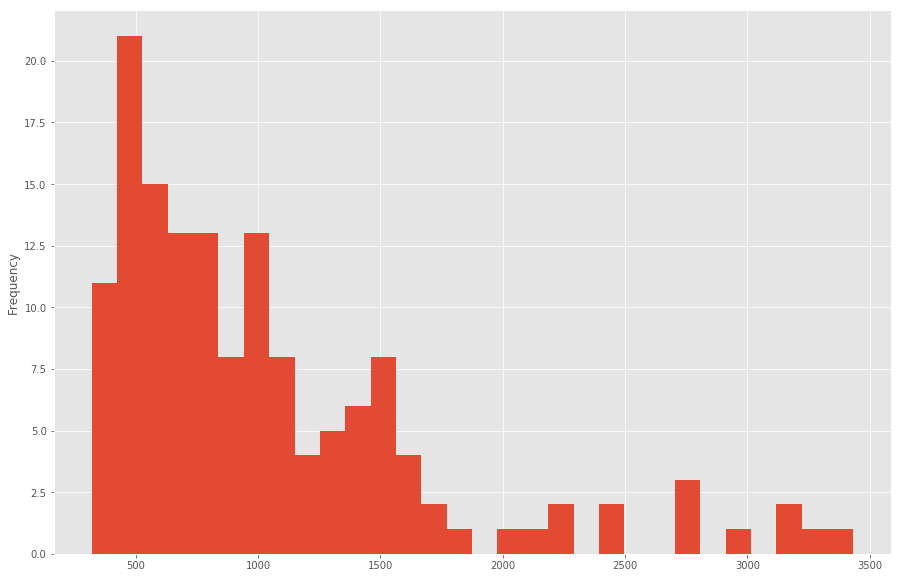

In [17]:
dfBang.priceMod.plot(kind = "hist", bins = 30)

In [18]:
dfBang['priceModLog'] = np.log(dfBang.priceMod)
dfBang.head()

,quantity,priceMod,date,priceModLog
Index_data,,,,
2004-01-01,227832,991,2004-01-01,6.898715
2004-02-01,225133,793,2004-02-01,6.675823
2004-03-01,221952,556,2004-03-01,6.320768
2004-04-01,185150,465,2004-04-01,6.142037
2004-05-01,137390,455,2004-05-01,6.120297


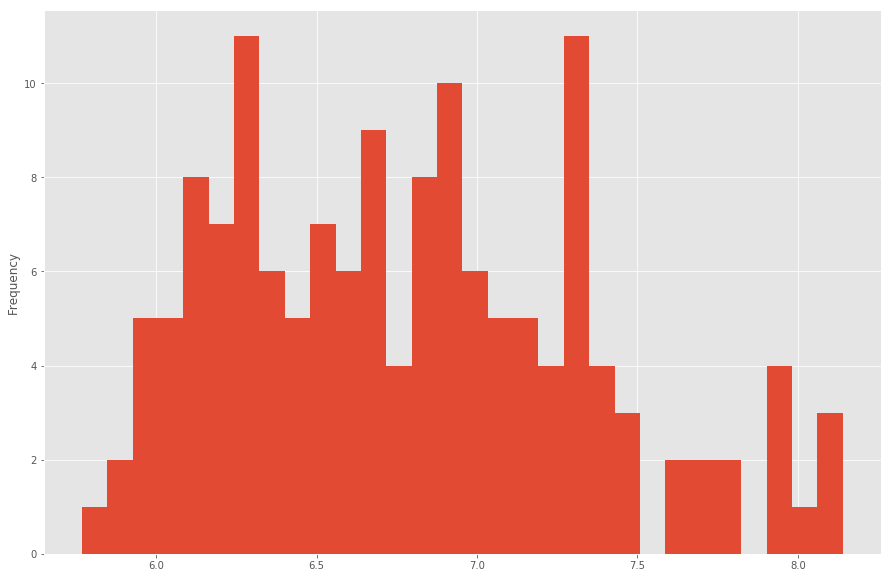

In [19]:
dfBang.priceModLog.plot(kind = "hist", bins = 30)

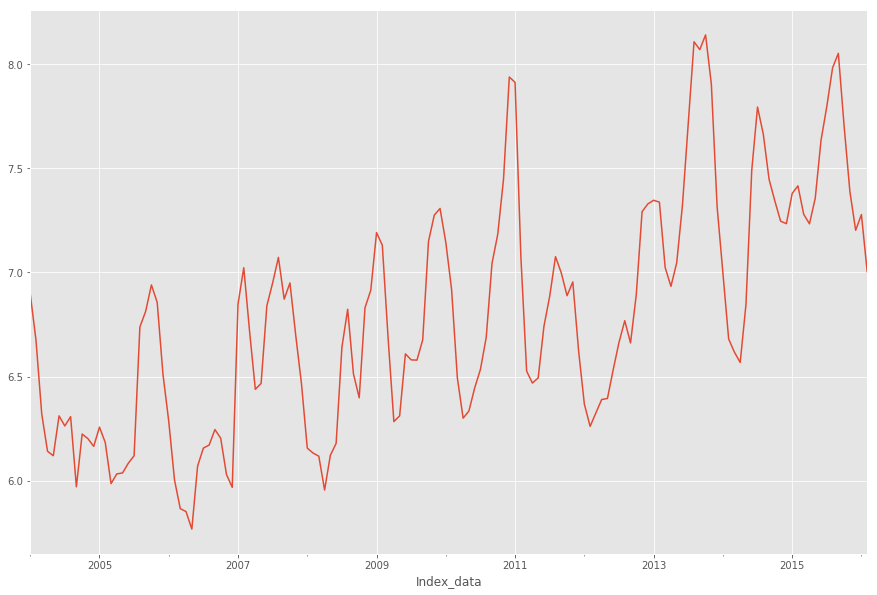

In [20]:
dfBang.priceModLog.plot()

###### Model  średniej

In [21]:
#wyliczamy średnią z ustabilizowanych danych
model_mean_pred = dfBang.priceModLog.mean()

In [22]:
dfBang["priceMean"] = np.exp(model_mean_pred)

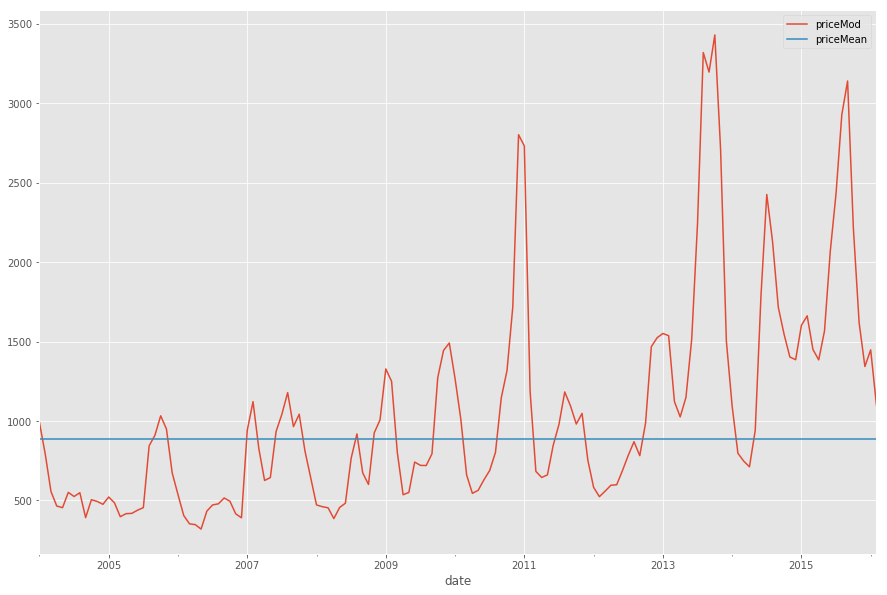

In [23]:
dfBang.plot(kind = "line", x="date", y = ["priceMod", "priceMean"])

In [24]:
def RMSE(pred_val,val):
    mse = (pred_val - val)**2
    rmse = np.sqrt(mse.sum()/mse.count())
    return rmse

In [25]:
model_mean_RMSE = RMSE(dfBang.priceMean,dfBang.priceMod)
model_mean_RMSE

683.9533483996255

In [26]:
dfBangResults = pd.DataFrame(columns = ["Model","Forecast","RMSE"])
dfBangResults.head()

,Model,Forecast,RMSE


In [27]:
dfBangResults.loc[0,"Model"] = "Mean"
dfBangResults.loc[0,"Forecast"] = np.exp(model_mean_pred)
dfBangResults.loc[0,"RMSE"] = model_mean_RMSE
dfBangResults.head()

,Model,Forecast,RMSE
0,Mean,884.566,683.953


In [28]:
dfBang.tail()

,quantity,priceMod,date,priceModLog,priceMean
Index_data,,,,,
2015-10-01,1612160,2215,2015-10-01,7.703008,884.565812
2015-11-01,1071872,1618,2015-11-01,7.388946,884.565812
2015-12-01,513186,1343,2015-12-01,7.202661,884.565812
2016-01-01,507223,1448,2016-01-01,7.277939,884.565812
2016-02-01,400359,1101,2016-02-01,7.003974,884.565812


######  Model trendu liniowego

In [29]:
dfBang.head()

,quantity,priceMod,date,priceModLog,priceMean
Index_data,,,,,
2004-01-01,227832,991,2004-01-01,6.898715,884.565812
2004-02-01,225133,793,2004-02-01,6.675823,884.565812
2004-03-01,221952,556,2004-03-01,6.320768,884.565812
2004-04-01,185150,465,2004-04-01,6.142037,884.565812
2004-05-01,137390,455,2004-05-01,6.120297,884.565812


In [30]:
dfBang.dtypes

quantity                int64
priceMod                int64
date           datetime64[ns]
priceModLog           float64
priceMean             float64
dtype: object

In [31]:
#Piersza data
date_min = dfBang.date.min()
date_min


Timestamp('2004-01-01 00:00:00')

In [32]:
dfBang["timeIndex"] = dfBang.date - date_min
dfBang.head()

,quantity,priceMod,date,priceModLog,priceMean,timeIndex
Index_data,,,,,,
2004-01-01,227832,991,2004-01-01,6.898715,884.565812,0 days
2004-02-01,225133,793,2004-02-01,6.675823,884.565812,31 days
2004-03-01,221952,556,2004-03-01,6.320768,884.565812,60 days
2004-04-01,185150,465,2004-04-01,6.142037,884.565812,91 days
2004-05-01,137390,455,2004-05-01,6.120297,884.565812,121 days


In [33]:
dfBang.head()

,quantity,priceMod,date,priceModLog,priceMean,timeIndex
Index_data,,,,,,
2004-01-01,227832,991,2004-01-01,6.898715,884.565812,0 days
2004-02-01,225133,793,2004-02-01,6.675823,884.565812,31 days
2004-03-01,221952,556,2004-03-01,6.320768,884.565812,60 days
2004-04-01,185150,465,2004-04-01,6.142037,884.565812,91 days
2004-05-01,137390,455,2004-05-01,6.120297,884.565812,121 days


In [34]:
dfBang["timeIndex"] = dfBang["timeIndex"]/np.timedelta64(1,'M')

In [35]:
dfBang.head()

,quantity,priceMod,date,priceModLog,priceMean,timeIndex
Index_data,,,,,,
2004-01-01,227832,991,2004-01-01,6.898715,884.565812,0.000000
2004-02-01,225133,793,2004-02-01,6.675823,884.565812,1.018501
2004-03-01,221952,556,2004-03-01,6.320768,884.565812,1.971293
2004-04-01,185150,465,2004-04-01,6.142037,884.565812,2.989794
2004-05-01,137390,455,2004-05-01,6.120297,884.565812,3.975441


In [36]:
dfBang["timeIndex"] = dfBang["timeIndex"].round(0).astype(int)

In [37]:
dfBang.head()

,quantity,priceMod,date,priceModLog,priceMean,timeIndex
Index_data,,,,,,
2004-01-01,227832,991,2004-01-01,6.898715,884.565812,0
2004-02-01,225133,793,2004-02-01,6.675823,884.565812,1
2004-03-01,221952,556,2004-03-01,6.320768,884.565812,2
2004-04-01,185150,465,2004-04-01,6.142037,884.565812,3
2004-05-01,137390,455,2004-05-01,6.120297,884.565812,4


In [38]:
dfBang.tail()

,quantity,priceMod,date,priceModLog,priceMean,timeIndex
Index_data,,,,,,
2015-10-01,1612160,2215,2015-10-01,7.703008,884.565812,141
2015-11-01,1071872,1618,2015-11-01,7.388946,884.565812,142
2015-12-01,513186,1343,2015-12-01,7.202661,884.565812,143
2016-01-01,507223,1448,2016-01-01,7.277939,884.565812,144
2016-02-01,400359,1101,2016-02-01,7.003974,884.565812,145


In [110]:
# Regresja liniowa za pomocą MNK
model_linear = smf.ols('priceModLog ~ timeIndex', data = dfBang).fit()

In [111]:
model_linear.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            priceModLog   R-squared:                       0.493
Model:                            OLS   Adj. R-squared:                  0.489
Method:                 Least Squares   F-statistic:                     139.8
Date:                Thu, 28 Mar 2019   Prob (F-statistic):           5.75e-23
Time:                        18:47:25   Log-Likelihood:                -72.317
No. Observations:                 146   AIC:                             148.6
Df Residuals:                     144   BIC:                             154.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      6.1121      0.066     92.830      0.000       5.982       6.242
timeIndex      0.0093      0.001     11.823      0.000       0.008       0.011
==============================================================================
Omnibus:                        4.750   Durbin-Watson:                   0.384
Prob(Omnibus):                  0.093   Jarque-Bera (JB):                4.739
Skew:                           0.405   Prob(JB):                       0.0935
Kurtosis:                       2.648   Cond. No.                         167.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [41]:
# Dobieramy parametry równanina y = ax + b
model_linear.params

Intercept    6.112108
timeIndex    0.009283
dtype: float64

In [42]:
b = model_linear.params[0]
a = model_linear.params[1]
print(a)
print(b)

0.009282603918039922
6.112108132763634


In [43]:
model_linear_pred = model_linear.predict()
model_linear_pred

array([6.11210813, 6.12139074, 6.13067334, 6.13995594, 6.14923855,
       6.15852115, 6.16780376, 6.17708636, 6.18636896, 6.19565157,
       6.20493417, 6.21421678, 6.22349938, 6.23278198, 6.24206459,
       6.25134719, 6.2606298 , 6.2699124 , 6.279195  , 6.28847761,
       6.29776021, 6.30704282, 6.31632542, 6.32560802, 6.33489063,
       6.34417323, 6.35345583, 6.36273844, 6.37202104, 6.38130365,
       6.39058625, 6.39986885, 6.40915146, 6.41843406, 6.42771667,
       6.43699927, 6.44628187, 6.45556448, 6.46484708, 6.47412969,
       6.48341229, 6.49269489, 6.5019775 , 6.5112601 , 6.52054271,
       6.52982531, 6.53910791, 6.54839052, 6.55767312, 6.56695572,
       6.57623833, 6.58552093, 6.59480354, 6.60408614, 6.61336874,
       6.62265135, 6.63193395, 6.64121656, 6.65049916, 6.65978176,
       6.66906437, 6.67834697, 6.68762958, 6.69691218, 6.70619478,
       6.71547739, 6.72475999, 6.7340426 , 6.7433252 , 6.7526078 ,
       6.76189041, 6.77117301, 6.78045561, 6.78973822, 6.79902

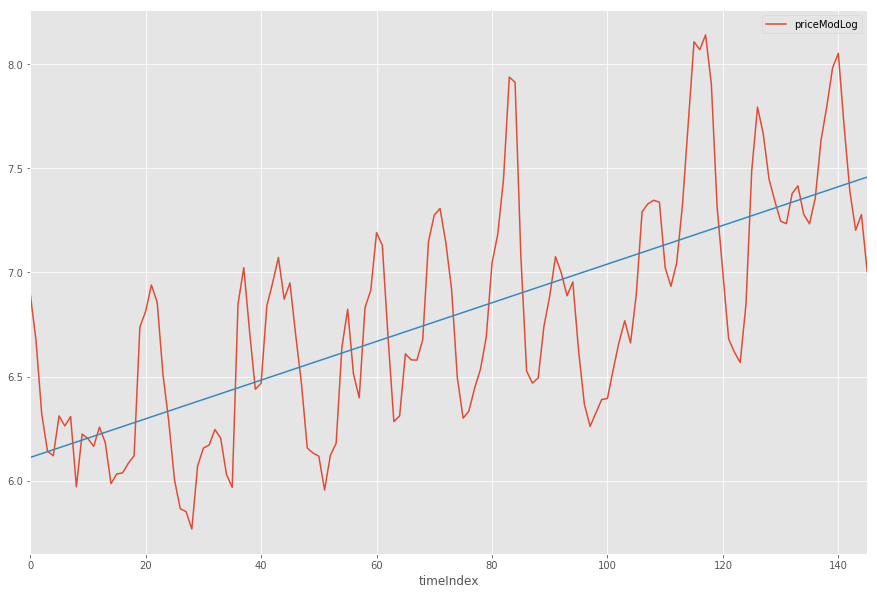

In [44]:
dfBang.plot(kind = "line", x="timeIndex", y = ["priceModLog"])
plt.plot(dfBang.timeIndex,model_linear_pred,'-')

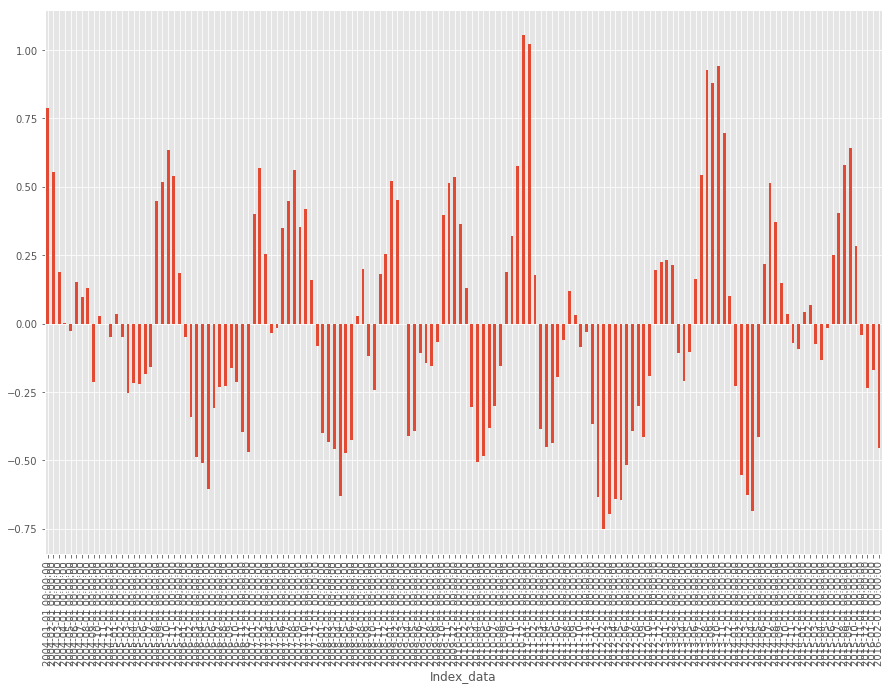

In [45]:
model_linear.resid.plot(kind = "bar")

In [46]:
#Ręczne wyliczenie przewidywania
model_linear_forecast_man = a * 146 + b
model_linear_forecast_man

7.467368304797462

In [47]:
#Przy użyciu funkcji
model_linear_forecast_funct = model_linear.predict(exog = dict(timeIndex=146))
model_linear_forecast_funct

0    7.467368
dtype: float64

In [48]:
dfBang["priceLinear"] = np.exp(model_linear_pred)
dfBang.head()

,quantity,priceMod,date,priceModLog,priceMean,timeIndex,priceLinear
Index_data,,,,,,,
2004-01-01,227832,991,2004-01-01,6.898715,884.565812,0,451.289090
2004-02-01,225133,793,2004-02-01,6.675823,884.565812,1,455.497732
2004-03-01,221952,556,2004-03-01,6.320768,884.565812,2,459.745622
2004-04-01,185150,465,2004-04-01,6.142037,884.565812,3,464.033127
2004-05-01,137390,455,2004-05-01,6.120297,884.565812,4,468.360617


In [49]:
#RMSE
model_linear_RMSE = RMSE(dfBang.priceLinear, dfBang.priceMod)
model_linear_RMSE

518.523607584147

In [50]:
dfBangResults.loc[1,"Model"] = "Linear"
dfBangResults.loc[1,"Forecast"] = np.exp(model_linear_forecast_man)
dfBangResults.loc[1,"RMSE"] = model_linear_RMSE
dfBangResults.head()

,Model,Forecast,RMSE
0,Mean,884.566,683.953
1,Linear,1750,518.524


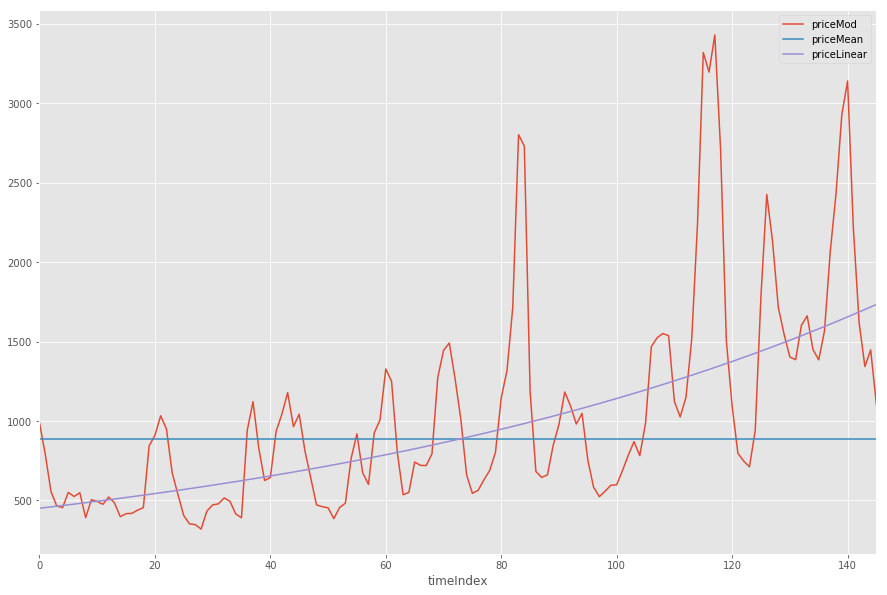

In [51]:
dfBang.plot(kind = "line",x="timeIndex",y=["priceMod","priceMean","priceLinear"])

#####  Metoda kroków losowych

In [52]:
dfBang["priceModLogShift1"] = dfBang.priceModLog.shift()

In [53]:
dfBang.head()

,quantity,priceMod,date,priceModLog,priceMean,timeIndex,priceLinear,priceModLogShift1
Index_data,,,,,,,,
2004-01-01,227832,991,2004-01-01,6.898715,884.565812,0,451.289090,NaN
2004-02-01,225133,793,2004-02-01,6.675823,884.565812,1,455.497732,6.898715
2004-03-01,221952,556,2004-03-01,6.320768,884.565812,2,459.745622,6.675823
2004-04-01,185150,465,2004-04-01,6.142037,884.565812,3,464.033127,6.320768
2004-05-01,137390,455,2004-05-01,6.120297,884.565812,4,468.360617,6.142037


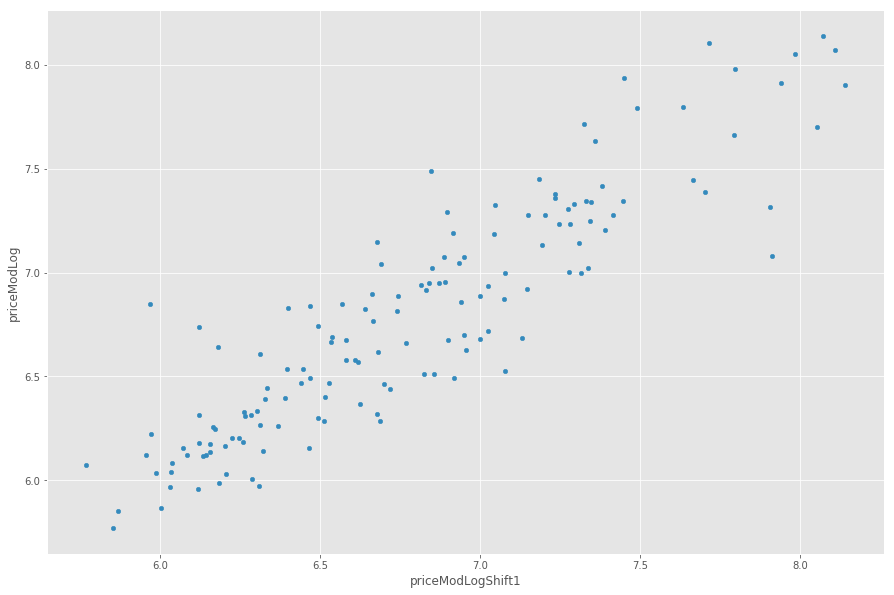

In [54]:
dfBang.plot(kind = "scatter", y="priceModLog", x="priceModLogShift1")

In [55]:
#Zmiany wzgkędem poszczególnych miesięcy
dfBang["priceModLogDiff"] = dfBang.priceModLog - dfBang.priceModLogShift1

In [56]:
dfBang.head()

,quantity,priceMod,date,priceModLog,priceMean,timeIndex,priceLinear,priceModLogShift1,priceModLogDiff
Index_data,,,,,,,,,
2004-01-01,227832,991,2004-01-01,6.898715,884.565812,0,451.289090,NaN,NaN
2004-02-01,225133,793,2004-02-01,6.675823,884.565812,1,455.497732,6.898715,-0.222891
2004-03-01,221952,556,2004-03-01,6.320768,884.565812,2,459.745622,6.675823,-0.355055
2004-04-01,185150,465,2004-04-01,6.142037,884.565812,3,464.033127,6.320768,-0.178731
2004-05-01,137390,455,2004-05-01,6.120297,884.565812,4,468.360617,6.142037,-0.021740


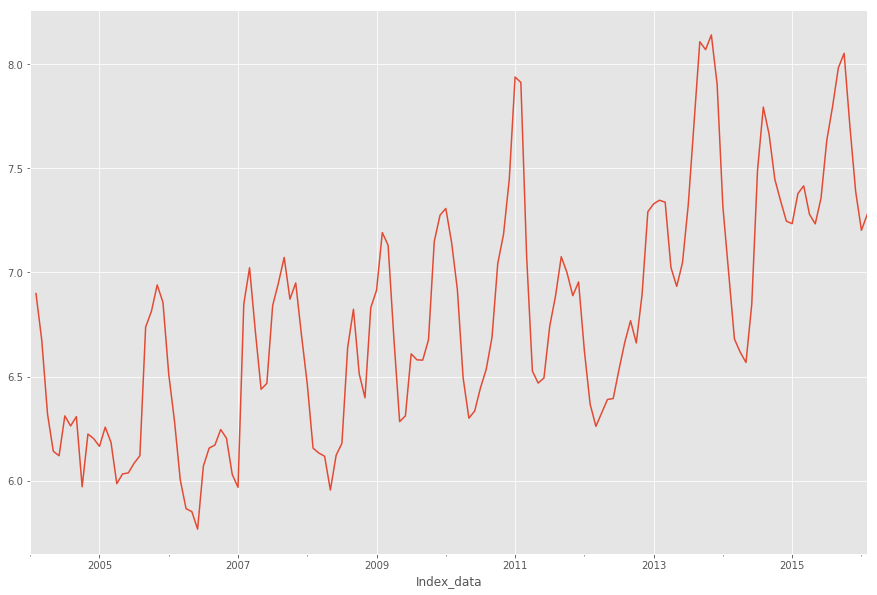

In [57]:
dfBang.priceModLogShift1.plot()

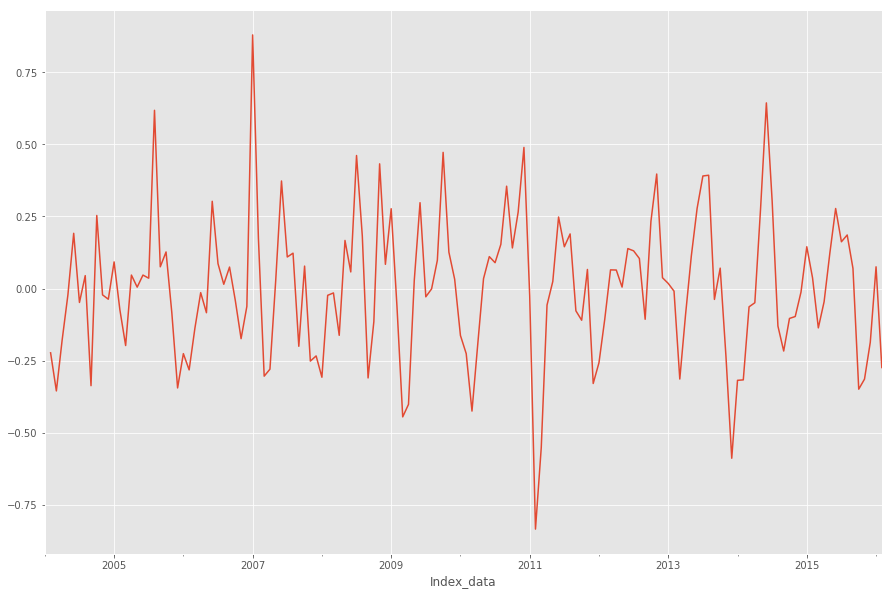

In [58]:
dfBang.priceModLogDiff.plot()

In [59]:
dfBang["priceRandom"] = np.exp(dfBang.priceModLogShift1)
dfBang.head()

,quantity,priceMod,date,priceModLog,priceMean,timeIndex,priceLinear,priceModLogShift1,priceModLogDiff,priceRandom
Index_data,,,,,,,,,,
2004-01-01,227832,991,2004-01-01,6.898715,884.565812,0,451.289090,NaN,NaN,NaN
2004-02-01,225133,793,2004-02-01,6.675823,884.565812,1,455.497732,6.898715,-0.222891,991.0
2004-03-01,221952,556,2004-03-01,6.320768,884.565812,2,459.745622,6.675823,-0.355055,793.0
2004-04-01,185150,465,2004-04-01,6.142037,884.565812,3,464.033127,6.320768,-0.178731,556.0
2004-05-01,137390,455,2004-05-01,6.120297,884.565812,4,468.360617,6.142037,-0.021740,465.0


In [60]:
dfBang.tail()

,quantity,priceMod,date,priceModLog,priceMean,timeIndex,priceLinear,priceModLogShift1,priceModLogDiff,priceRandom
Index_data,,,,,,,,,,
2015-10-01,1612160,2215,2015-10-01,7.703008,884.565812,141,1670.628673,8.051978,-0.348970,3140.0
2015-11-01,1071872,1618,2015-11-01,7.388946,884.565812,142,1686.208656,7.703008,-0.314062,2215.0
2015-12-01,513186,1343,2015-12-01,7.202661,884.565812,143,1701.933936,7.388946,-0.186285,1618.0
2016-01-01,507223,1448,2016-01-01,7.277939,884.565812,144,1717.805867,7.202661,0.075277,1343.0
2016-02-01,400359,1101,2016-02-01,7.003974,884.565812,145,1733.825817,7.277939,-0.273964,1448.0


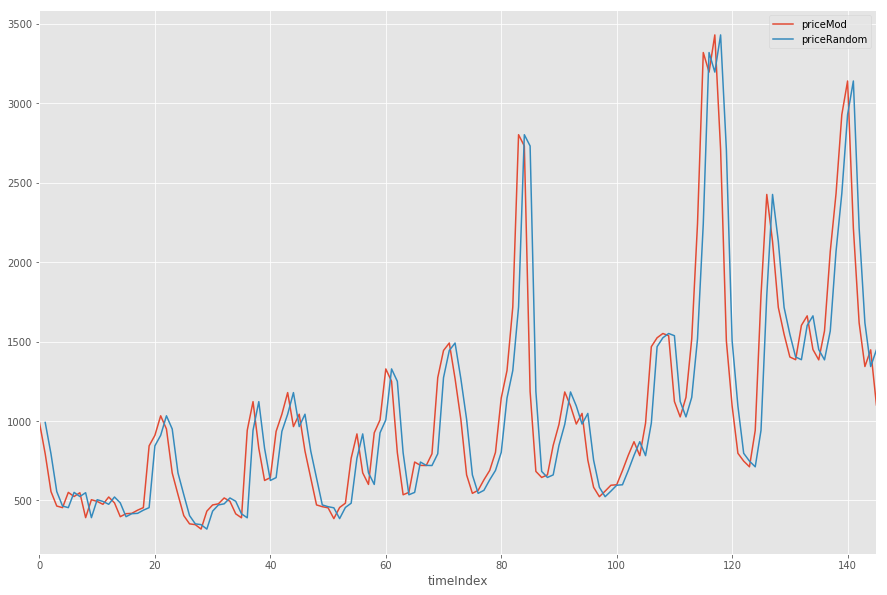

In [61]:
dfBang.plot(kind="line", x="timeIndex", y = ["priceMod","priceRandom"])

In [62]:
#RMSE
model_random_RMSE = RMSE(dfBang.priceRandom, dfBang.priceMod)
model_random_RMSE

323.59240006420174

In [63]:
dfBangResults.loc[2,"Model"] = "Random"
dfBangResults.loc[2,"Forecast"] = np.exp(dfBang.priceModLogShift1[-1])
dfBangResults.loc[2,"RMSE"] = model_random_RMSE
dfBangResults.head()

,Model,Forecast,RMSE
0,Mean,884.566,683.953
1,Linear,1750,518.524
2,Random,1448,323.592


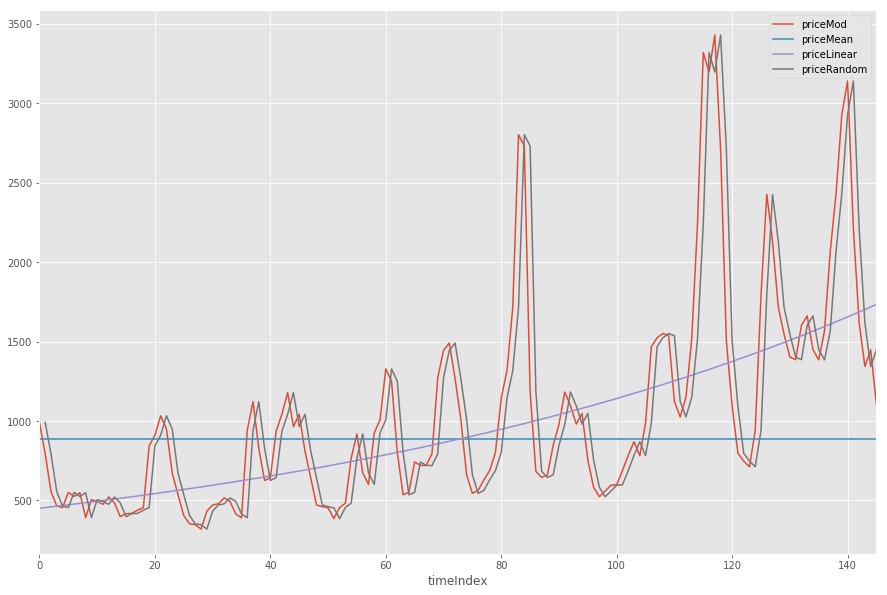

In [64]:
dfBang.plot(kind="line", x="timeIndex", y = ["priceMod", "priceMean", "priceLinear", "priceRandom"])

## Modele bardziej zaawansowane

###### Test standaryzacji

In [65]:
def adf(ts):
    rolmean = ts.rolling(12).mean()
    rolstd = ts.rolling(12).std()
    
    orig = plt.plot(ts, color='blue',label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)
    
    adftest = adfuller(ts, autolag='AIC')
    adfoutput = pd.Series(adftest[0:4], index=['Test Statistic','p-value','# of Lags Used',
                                              'Number of Observations Used'])
    for key,value in adftest[4].items():
        adfoutput['Critical Value (%s)'%key] = value
    return adfoutput

### Standaryzacja szeregu

#### Średnia ruchoma

In [66]:
#Wygładzenie wartości 
dfBang['priceModLogMA12'] = dfBang["priceModLog"].rolling(window = 12).mean()
dfBang.head()

,quantity,priceMod,date,priceModLog,priceMean,timeIndex,priceLinear,priceModLogShift1,priceModLogDiff,priceRandom,priceModLogMA12
Index_data,,,,,,,,,,,
2004-01-01,227832,991,2004-01-01,6.898715,884.565812,0,451.289090,NaN,NaN,NaN,NaN
2004-02-01,225133,793,2004-02-01,6.675823,884.565812,1,455.497732,6.898715,-0.222891,991.0,NaN
2004-03-01,221952,556,2004-03-01,6.320768,884.565812,2,459.745622,6.675823,-0.355055,793.0,NaN
2004-04-01,185150,465,2004-04-01,6.142037,884.565812,3,464.033127,6.320768,-0.178731,556.0,NaN
2004-05-01,137390,455,2004-05-01,6.120297,884.565812,4,468.360617,6.142037,-0.021740,465.0,NaN


In [67]:
dfBang.tail()

,quantity,priceMod,date,priceModLog,priceMean,timeIndex,priceLinear,priceModLogShift1,priceModLogDiff,priceRandom,priceModLogMA12
Index_data,,,,,,,,,,,
2015-10-01,1612160,2215,2015-10-01,7.703008,884.565812,141,1670.628673,8.051978,-0.348970,3140.0,7.526074
2015-11-01,1071872,1618,2015-11-01,7.388946,884.565812,142,1686.208656,7.703008,-0.314062,2215.0,7.537956
2015-12-01,513186,1343,2015-12-01,7.202661,884.565812,143,1701.933936,7.388946,-0.186285,1618.0,7.535329
2016-01-01,507223,1448,2016-01-01,7.277939,884.565812,144,1717.805867,7.202661,0.075277,1343.0,7.526907
2016-02-01,400359,1101,2016-02-01,7.003974,884.565812,145,1733.825817,7.277939,-0.273964,1448.0,7.492590


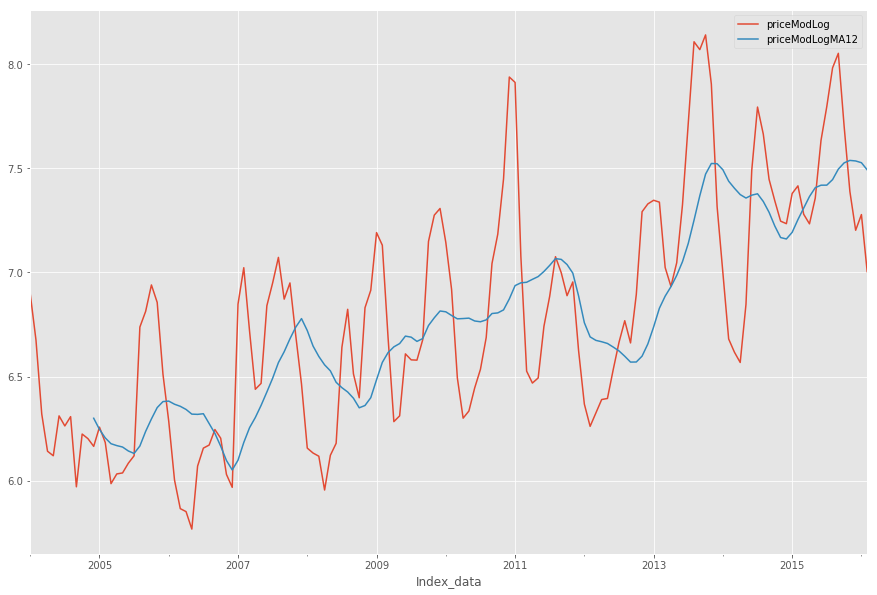

In [68]:
dfBang.plot(kind = "line", y = ["priceModLog","priceModLogMA12"])

In [69]:
dfBang["priceMA12"] = np.exp(dfBang.priceModLogMA12)
dfBang.tail()

,quantity,priceMod,date,priceModLog,priceMean,timeIndex,priceLinear,priceModLogShift1,priceModLogDiff,priceRandom,priceModLogMA12,priceMA12
Index_data,,,,,,,,,,,,
2015-10-01,1612160,2215,2015-10-01,7.703008,884.565812,141,1670.628673,8.051978,-0.348970,3140.0,7.526074,1855.805596
2015-11-01,1071872,1618,2015-11-01,7.388946,884.565812,142,1686.208656,7.703008,-0.314062,2215.0,7.537956,1877.986866
2015-12-01,513186,1343,2015-12-01,7.202661,884.565812,143,1701.933936,7.388946,-0.186285,1618.0,7.535329,1873.061120
2016-01-01,507223,1448,2016-01-01,7.277939,884.565812,144,1717.805867,7.202661,0.075277,1343.0,7.526907,1857.351582
2016-02-01,400359,1101,2016-02-01,7.003974,884.565812,145,1733.825817,7.277939,-0.273964,1448.0,7.492590,1794.694278


In [70]:
#Sprawdzamy przewidywanie
model_MA12_forecast = dfBang.priceModLog.tail(12).mean()
model_MA12_forecast

7.492589967948267

In [71]:
#RMSE
model_MA12_RMSE = RMSE(dfBang.priceMA12, dfBang.priceMod)
model_MA12_RMSE

518.821751048081

In [72]:
dfBangResults.loc[3,"Model"] = "Moving Average 12"
dfBangResults.loc[3,"Forecast"] = np.exp(model_MA12_forecast)
dfBangResults.loc[3,"RMSE"] = model_MA12_RMSE
dfBangResults.head()

,Model,Forecast,RMSE
0,Mean,884.566,683.953
1,Linear,1750,518.524
2,Random,1448,323.592
3,Moving Average 12,1794.69,518.822


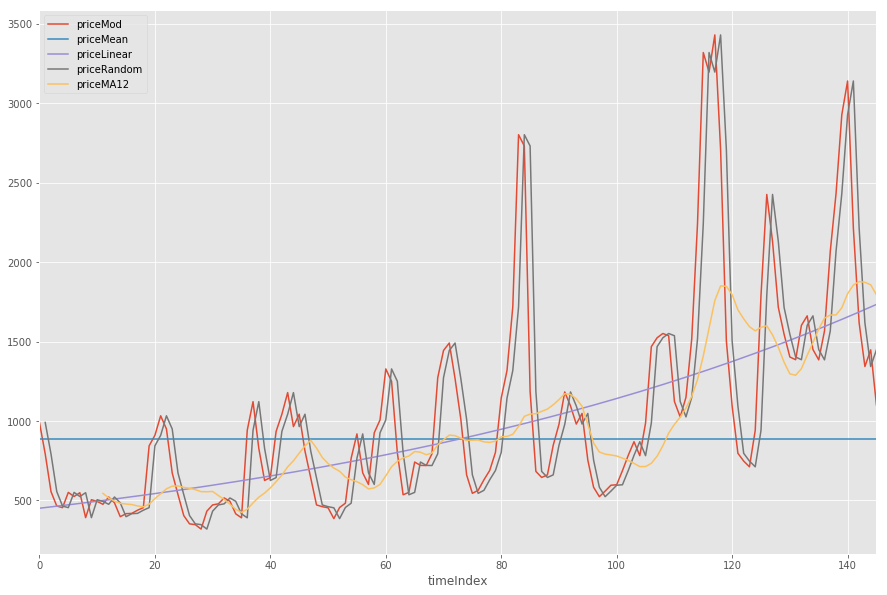

In [73]:
dfBang.plot(kind="line", x="timeIndex", y = ["priceMod", "priceMean", "priceLinear","priceRandom", "priceMA12"])

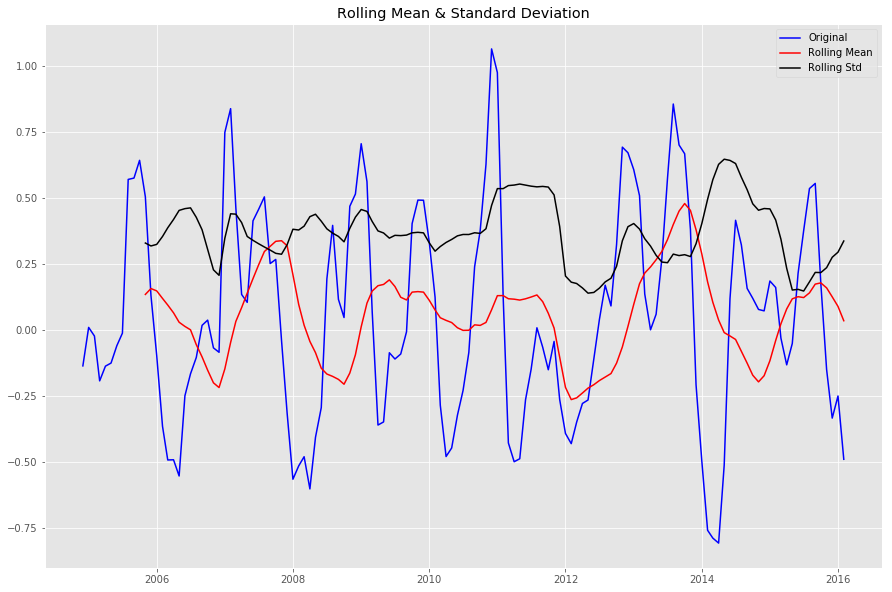

Test Statistic                -6.523729e+00
p-value                        1.026903e-08
# of Lags Used                 1.000000e+00
Number of Observations Used    1.330000e+02
Critical Value (1%)           -3.480500e+00
Critical Value (5%)           -2.883528e+00
Critical Value (10%)          -2.578496e+00
dtype: float64

In [74]:
#Test ADF
ts = dfBang.priceModLog - dfBang.priceModLogMA12
ts.dropna(inplace = True)
adf(ts)

###  Eliminowanie trendów i sezonowości

#### Wykorzystanie różnicy

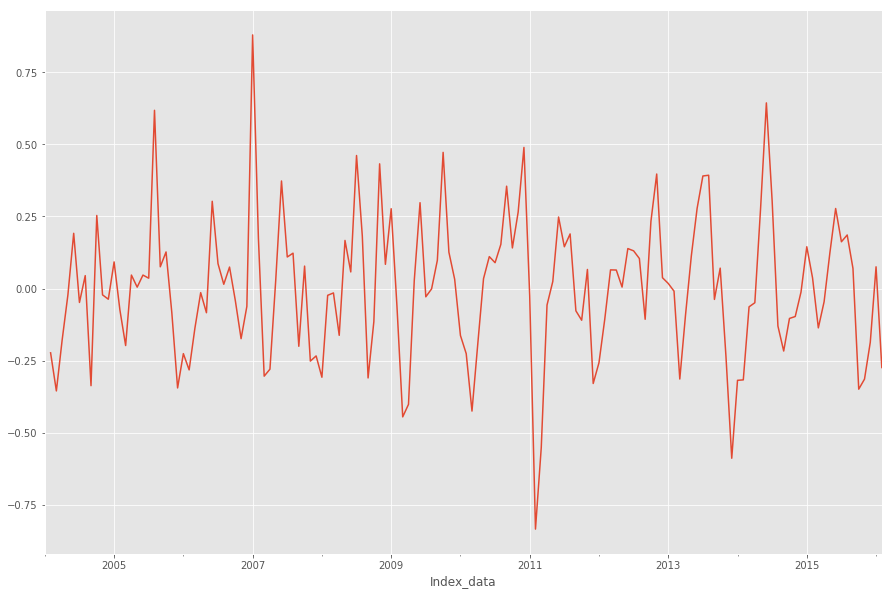

In [75]:
dfBang.priceModLogDiff.plot()

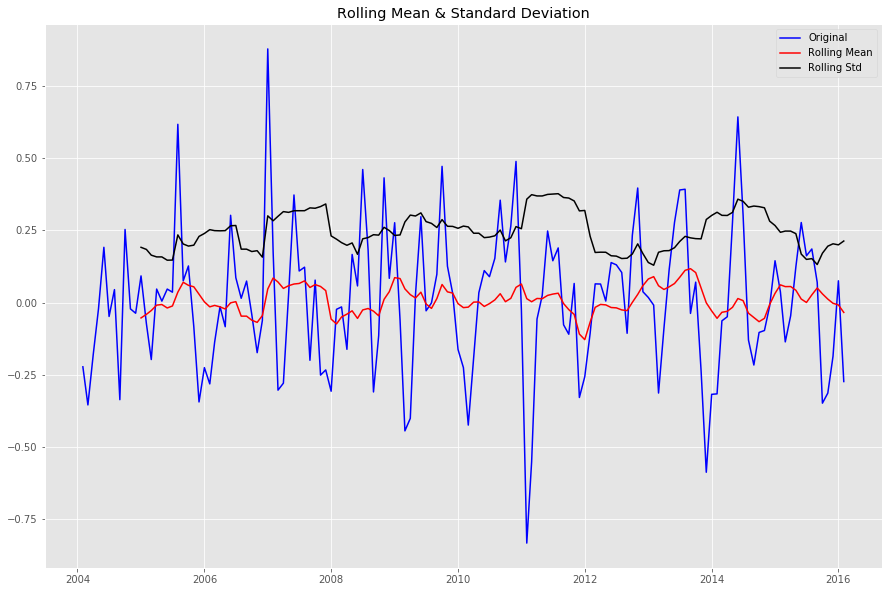

Test Statistic                -7.293246e+00
p-value                        1.399305e-10
# of Lags Used                 7.000000e+00
Number of Observations Used    1.370000e+02
Critical Value (1%)           -3.479007e+00
Critical Value (5%)           -2.882878e+00
Critical Value (10%)          -2.578149e+00
dtype: float64

In [76]:
#Test ADF
ts = dfBang.priceModLogDiff
ts.dropna(inplace = True)
adf(ts)

#### Dekompozycja

In [77]:
from statsmodels.tsa.seasonal import seasonal_decompose

In [78]:
decomposition = seasonal_decompose(dfBang.priceModLog, model = "additive")

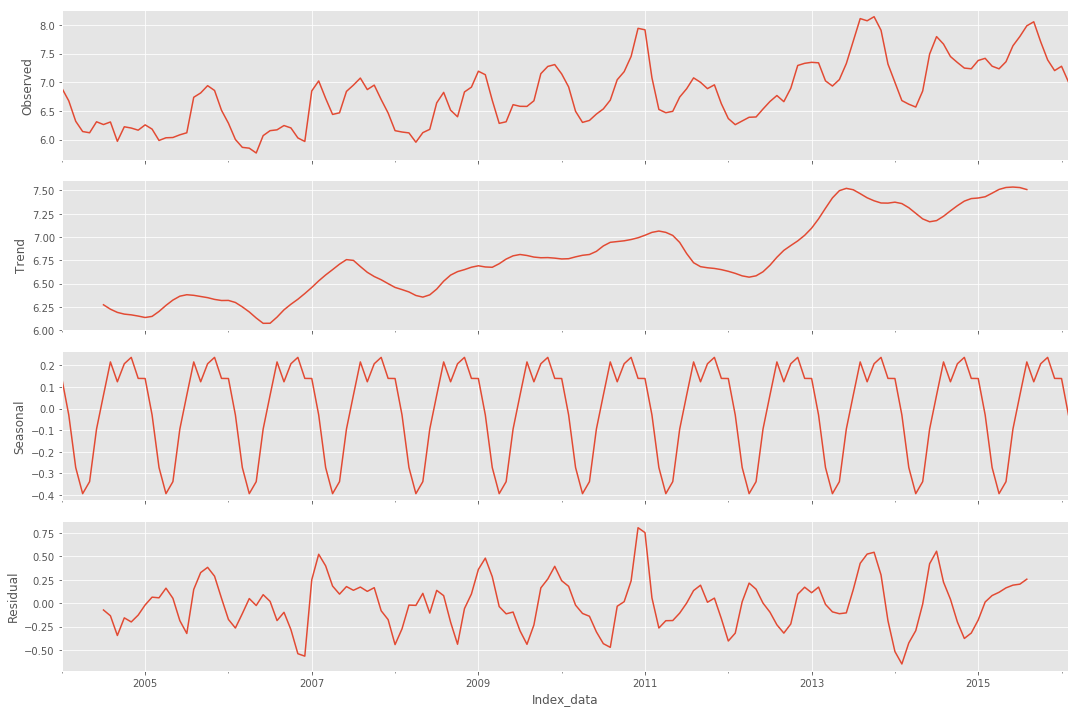

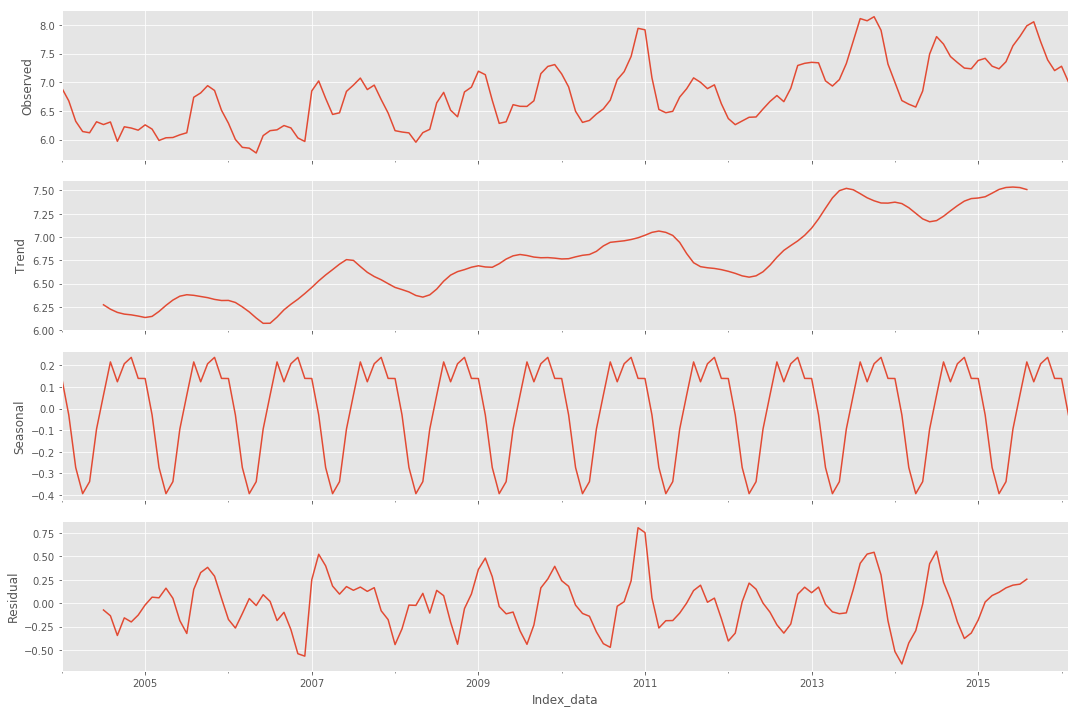

In [79]:
decomposition.plot()

In [80]:
trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

In [81]:
dfBang["priceDecomp"] = np.exp(trend + seasonal)

In [82]:
#RMSE
model_Decomp_RMSE = RMSE(dfBang.priceDecomp, dfBang.priceMod)
model_Decomp_RMSE

374.10858464802345

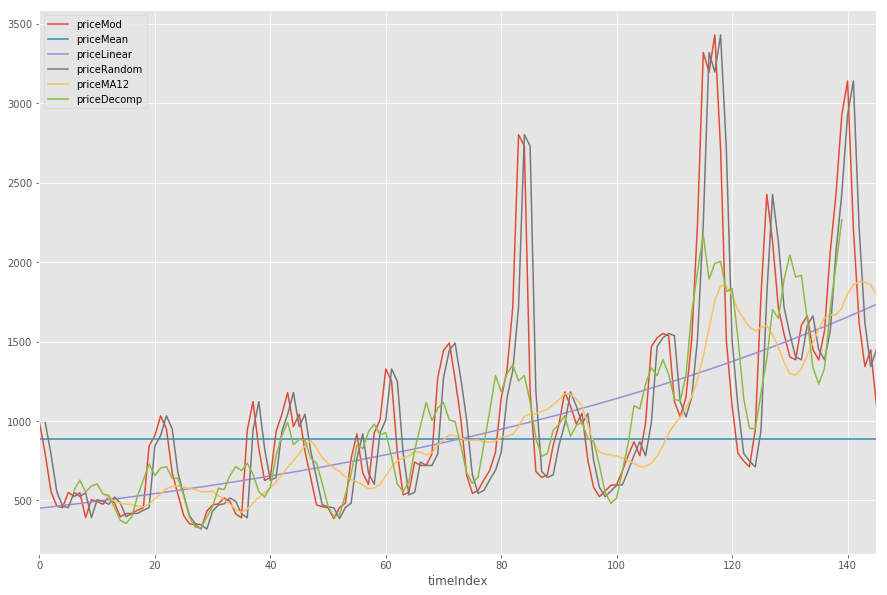

In [83]:
dfBang.plot(kind="line", x="timeIndex", y = ["priceMod", "priceMean", "priceLinear", "priceRandom",
                                             "priceMA12", "priceDecomp"])

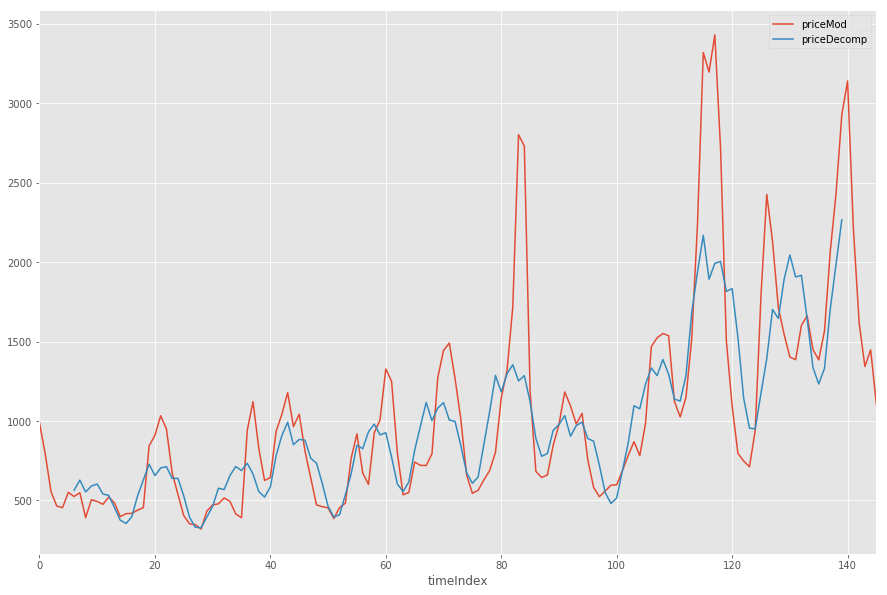

In [84]:
dfBang.plot(kind="line", x="timeIndex", y = ["priceMod",
                                              "priceDecomp"])

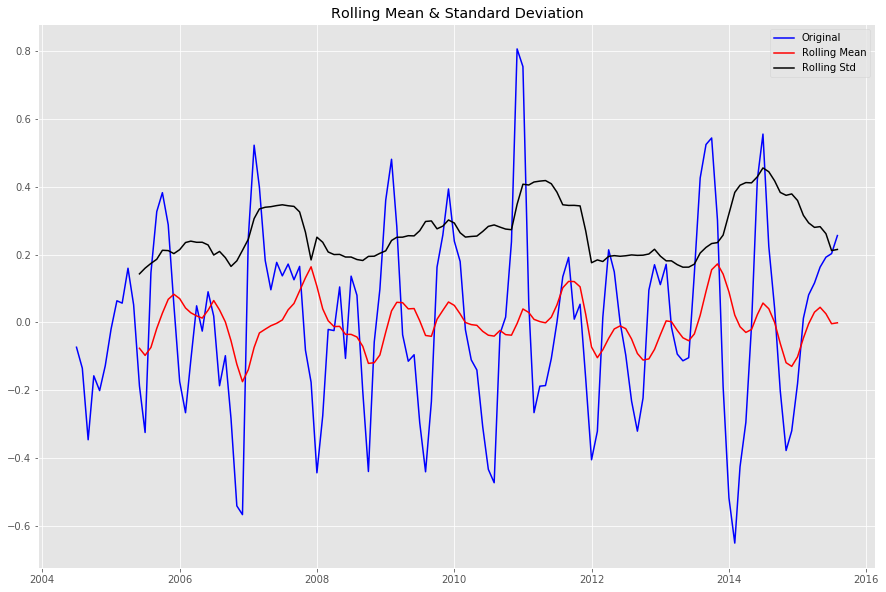

Test Statistic                -7.906662e+00
p-value                        4.049566e-12
# of Lags Used                 4.000000e+00
Number of Observations Used    1.290000e+02
Critical Value (1%)           -3.482088e+00
Critical Value (5%)           -2.884219e+00
Critical Value (10%)          -2.578864e+00
dtype: float64

In [85]:
#Test ADF
ts = decomposition.resid
ts.dropna(inplace = True)
adf(ts)

### ARIMA

In [86]:
ts = dfBang.priceModLog
ts_diff = dfBang.priceModLogDiff
ts_diff.dropna(inplace = True)

In [87]:
#ACF i PACF
from statsmodels.tsa.stattools import acf, pacf

In [88]:
lag_acf = acf(ts_diff, nlags=20)
lag_acf

array([ 1.        ,  0.40215445, -0.02855346, -0.21472715, -0.23756032,
       -0.26332645, -0.22038359, -0.08576989, -0.0754398 ,  0.01497797,
        0.12361818,  0.20862956,  0.158123  ,  0.02053933, -0.01290934,
       -0.07097602, -0.17993659, -0.09514604, -0.04878255, -0.08854117,
       -0.18810881])

In [89]:
ACF = pd.Series(lag_acf)
ACF

0     1.000000
1     0.402154
2    -0.028553
3    -0.214727
4    -0.237560
5    -0.263326
6    -0.220384
7    -0.085770
8    -0.075440
9     0.014978
10    0.123618
11    0.208630
12    0.158123
13    0.020539
14   -0.012909
15   -0.070976
16   -0.179937
17   -0.095146
18   -0.048783
19   -0.088541
20   -0.188109
dtype: float64

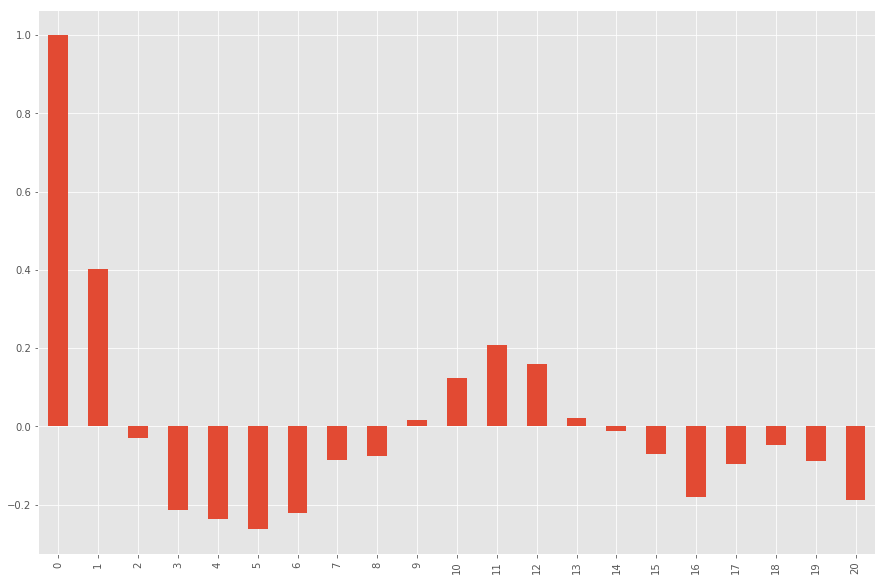

In [90]:
ACF.plot(kind = "bar")

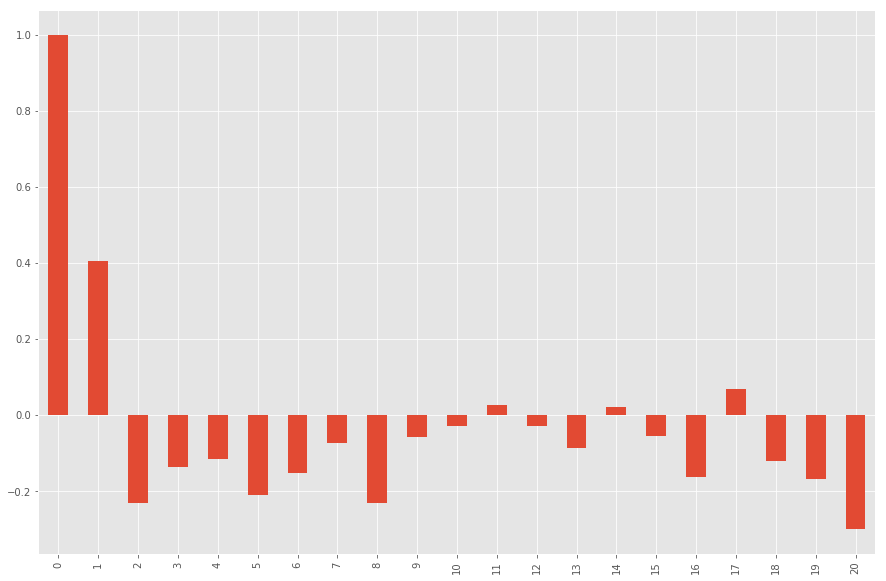

In [91]:
lag_pacf = pacf(ts_diff, nlags=20, method='ols')
PACF = pd.Series(lag_pacf)
PACF.plot(kind = "bar")

#### ARIMA wykorzystanie

In [92]:
from statsmodels.tsa.arima_model import ARIMA

In [93]:
ts_diff.head()

Index_data
2004-02-01   -0.222891
2004-03-01   -0.355055
2004-04-01   -0.178731
2004-05-01   -0.021740
2004-06-01    0.191437
Name: priceModLogDiff, dtype: float64

In [94]:
model_AR1MA = ARIMA(ts_diff, order=(1,0,1))

C:\Users\Vojty\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\Vojty\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:191: FutureWarning: Creating a DatetimeIndex by passing range endpoints is deprecated.  Use `pandas.date_range` instead.
  start=index[0], end=index[-1], freq=freq)


In [95]:
results_ARIMA = model_AR1MA.fit(disp = -1)

In [96]:
results_ARIMA.fittedvalues.head()

Index_data
2004-02-01   -0.000977
2004-03-01   -0.093805
2004-04-01   -0.139355
2004-05-01   -0.041727
2004-06-01    0.002164
dtype: float64

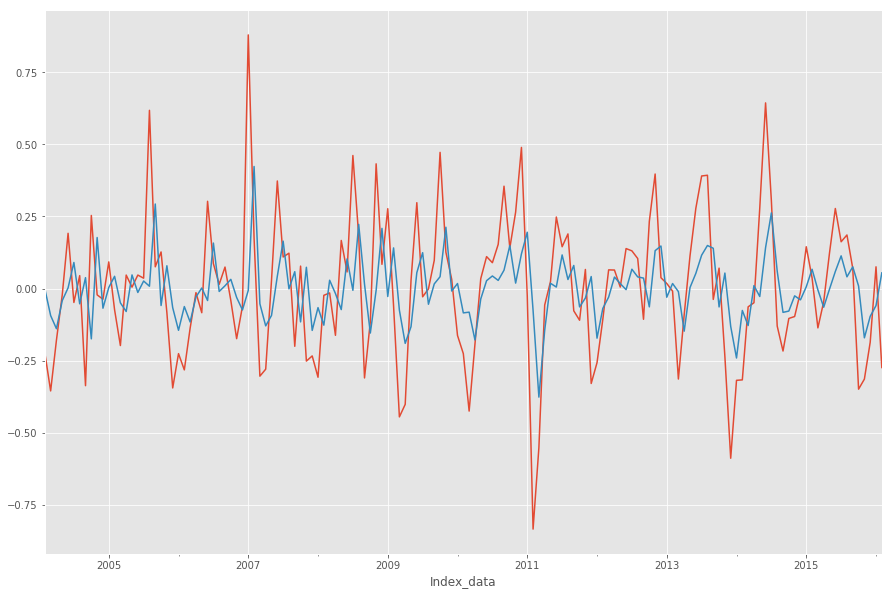

In [97]:
ts_diff.plot()
results_ARIMA.fittedvalues.plot()

In [98]:
ts_diff.sum()

0.1052596023926915

In [99]:
predictions_ARIMA_diff = pd.Series(results_ARIMA.fittedvalues, copy=True)
predictions_ARIMA_diff.tail()

Index_data
2015-10-01    0.008537
2015-11-01   -0.170970
2015-12-01   -0.096505
2016-01-01   -0.059154
2016-02-01    0.054308
dtype: float64

In [100]:
predictions_ARIMA_diff.sum()

0.07204827894014404

In [101]:
predictions_ARIMA_diff_cumsum = predictions_ARIMA_diff.cumsum()
predictions_ARIMA_diff_cumsum.tail()

Index_data
2015-10-01    0.344369
2015-11-01    0.173399
2015-12-01    0.076894
2016-01-01    0.017740
2016-02-01    0.072048
dtype: float64

In [102]:
ts.ix[0]

C:\Users\Vojty\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  """Entry point for launching an IPython kernel.


6.898714534329988

In [103]:
predictions_ARIMA_log = pd.Series(ts.ix[0], index=ts.index)
predictions_ARIMA_log = predictions_ARIMA_log.add(predictions_ARIMA_diff_cumsum,fill_value=0)
predictions_ARIMA_log.tail()

C:\Users\Vojty\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  """Entry point for launching an IPython kernel.


Index_data
2015-10-01    7.243083
2015-11-01    7.072113
2015-12-01    6.975608
2016-01-01    6.916454
2016-02-01    6.970763
dtype: float64

In [112]:
dfBang['priceARIMA'] = np.exp(predictions_ARIMA_log)

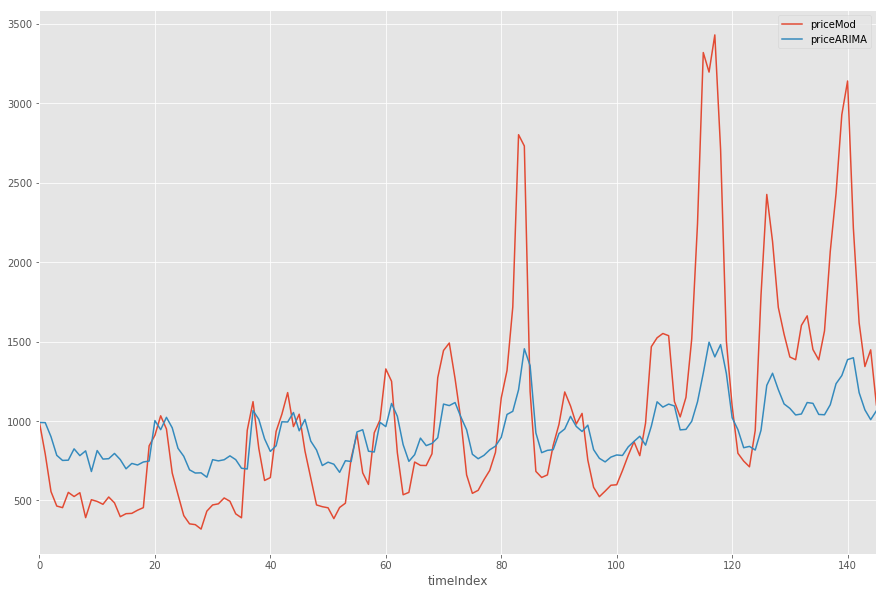

In [105]:
dfBang.plot(kind="line", x="timeIndex", y = ["priceMod", "priceARIMA"])

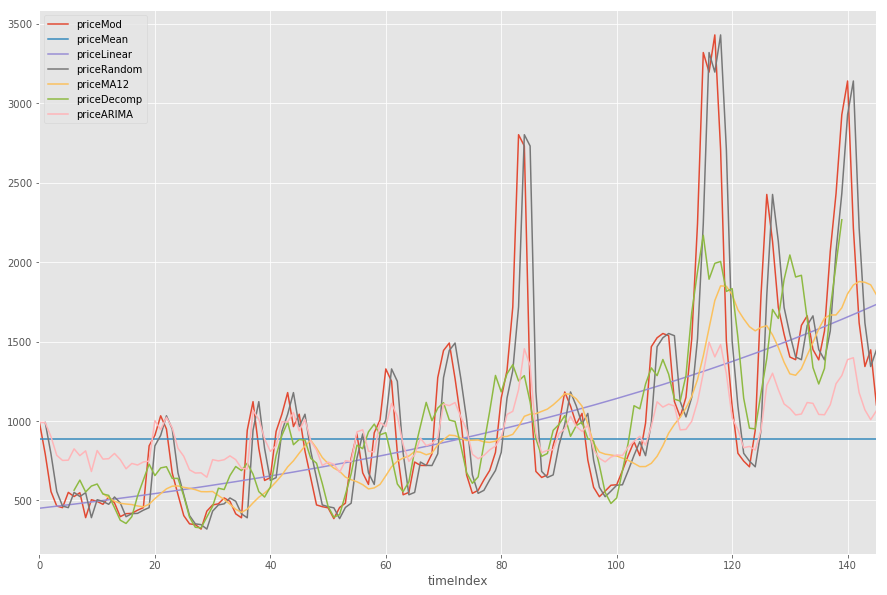

In [106]:
dfBang.plot(kind="line", x="timeIndex", y = ["priceMod", "priceMean", "priceLinear", "priceRandom",
                                             "priceMA12", "priceDecomp", "priceARIMA"])

In [115]:
dfBang["New"] = (dfBang.priceARIMA - dfBang.priceMean)*2+dfBang.priceMean 

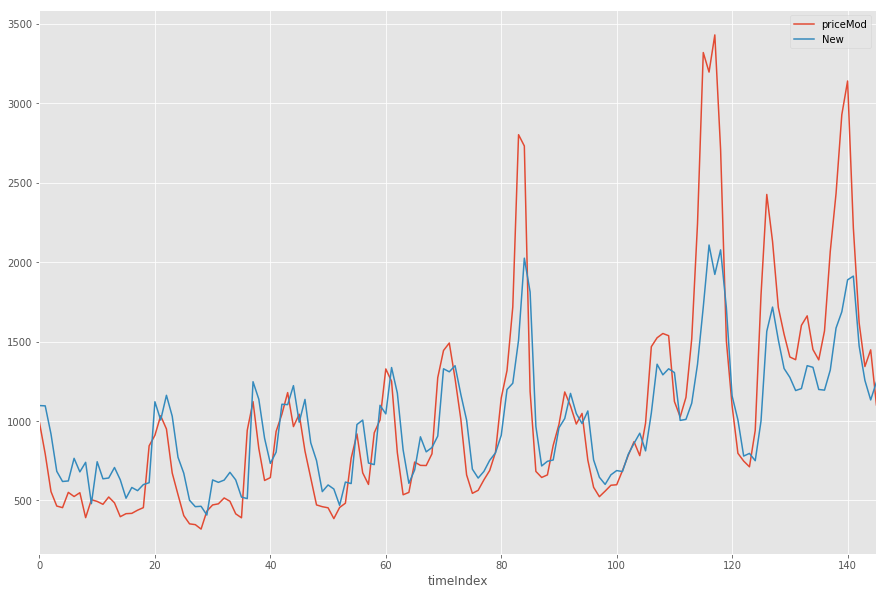

In [116]:
dfBang.plot(kind="line", x="timeIndex", y = ["priceMod", "New"])